In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
import pickle

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


([<matplotlib.axis.XTick at 0x25cbd00f608>,
 [Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')])

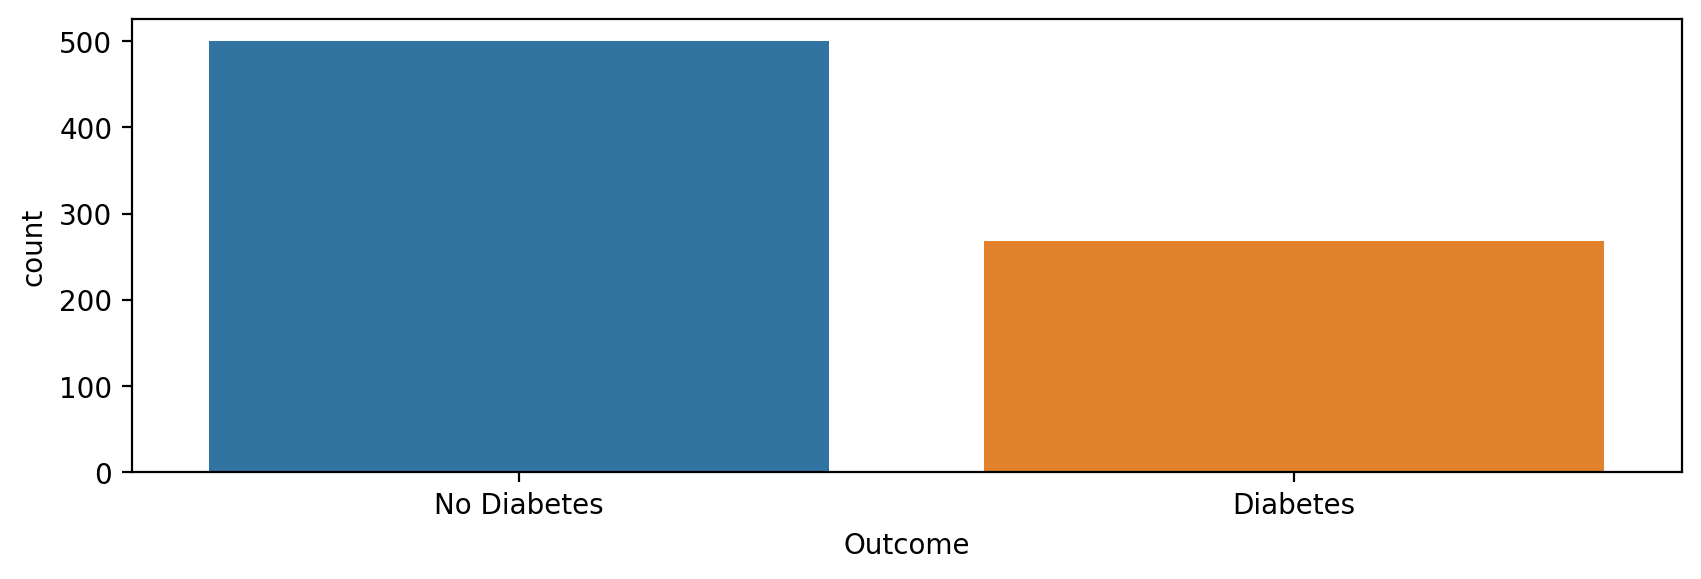

In [9]:
#Lets Visualize the data
plt.figure(figsize=(10,3),dpi=200)
sns.countplot(x='Outcome',data=df)
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0)

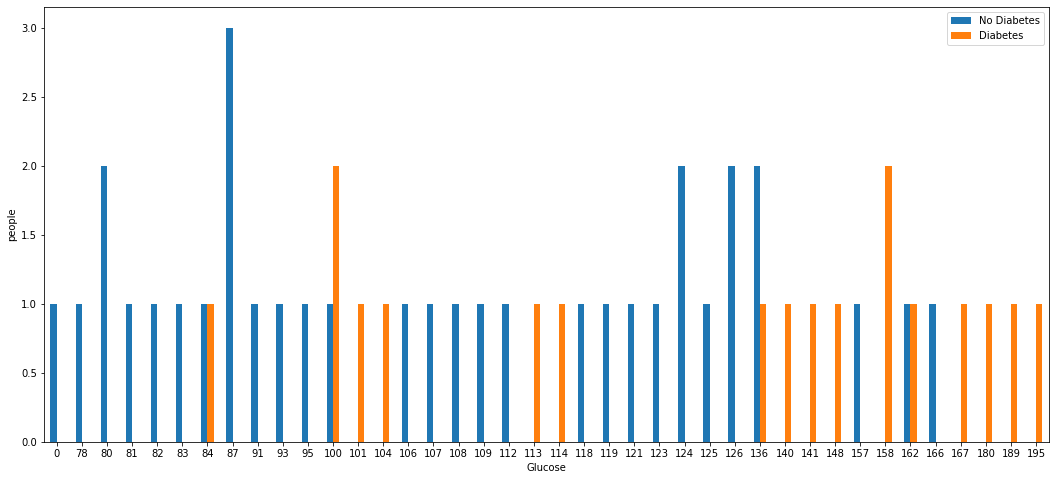

In [10]:
# Comparing Glucose with the Outcome
pd.crosstab(df.Glucose[::15],df.Outcome).plot(kind="bar",figsize=(18,8))
plt.ylabel("people")
plt.xticks(rotation=0)
plt.legend(['No Diabetes', 'Diabetes'])

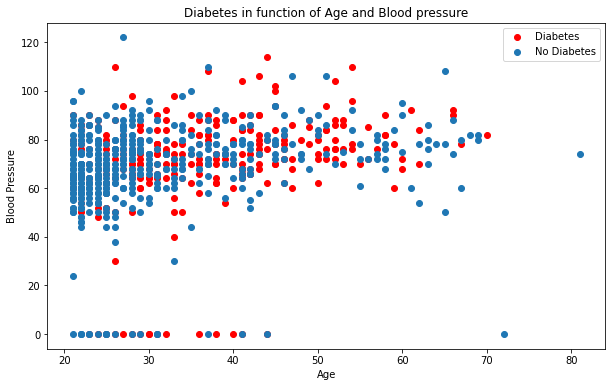

In [11]:
#find out Blood Pressure and age of entries who have diabetes
plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df.Age[df.Outcome==1],df.BloodPressure[df.Outcome==1], c = "Red")

# Scatter with negative example
plt.scatter(df.Age[df.Outcome==0],df.BloodPressure[df.Outcome==0])

# Add some helpful info
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"])

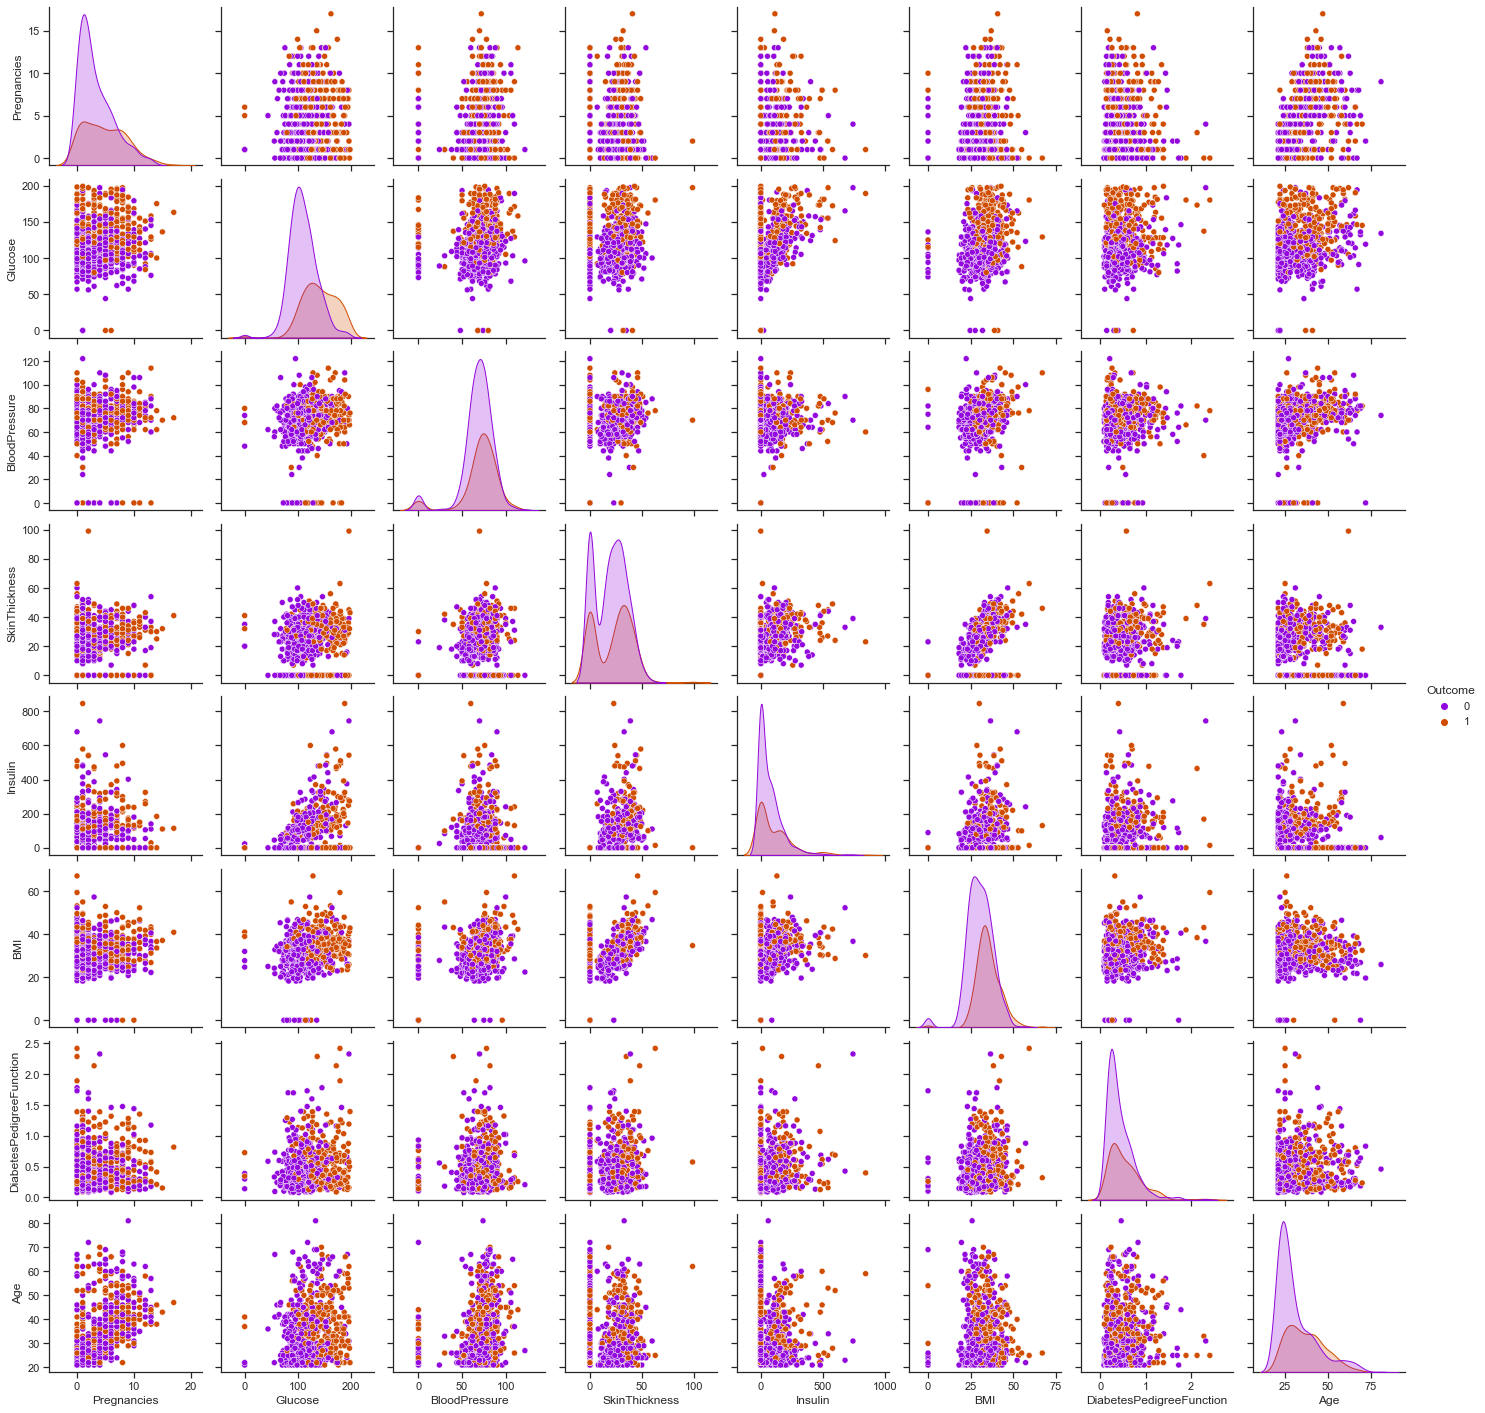

In [12]:
## Pairplotting of dataframe
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,hue='Outcome',palette='gnuplot')

(array([86., 75., 53., 26., 15.,  9.,  0.,  1.,  1.,  2.]),
 array([0.088 , 0.3212, 0.5544, 0.7876, 1.0208, 1.254 , 1.4872, 1.7204,
        1.9536, 2.1868, 2.42  ]),
 <BarContainer object of 10 artists>)

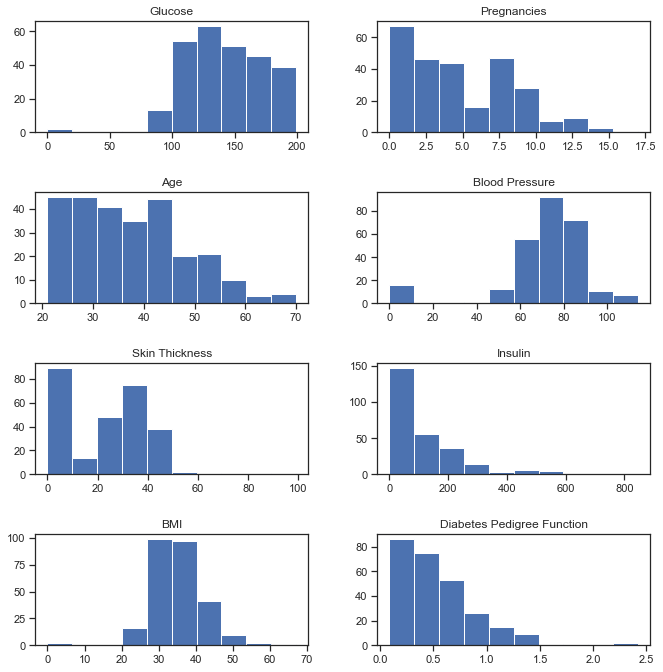

In [13]:
# Histogram of all coloumns when the Outcome is 1( has Diabetes)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(df.Glucose[df.Outcome==1])
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(df.Pregnancies[df.Outcome==1])
ax[1,0].set_title('Age')
ax[1,0].hist(df.Age[df.Outcome==1])
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(df.BloodPressure[df.Outcome==1])
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(df.SkinThickness[df.Outcome==1])
ax[2,1].set_title('Insulin')
ax[2,1].hist(df.Insulin[df.Outcome==1])
ax[3,0].set_title('BMI')
ax[3,0].hist(df.BMI[df.Outcome==1])
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(df.DiabetesPedigreeFunction[df.Outcome==1])

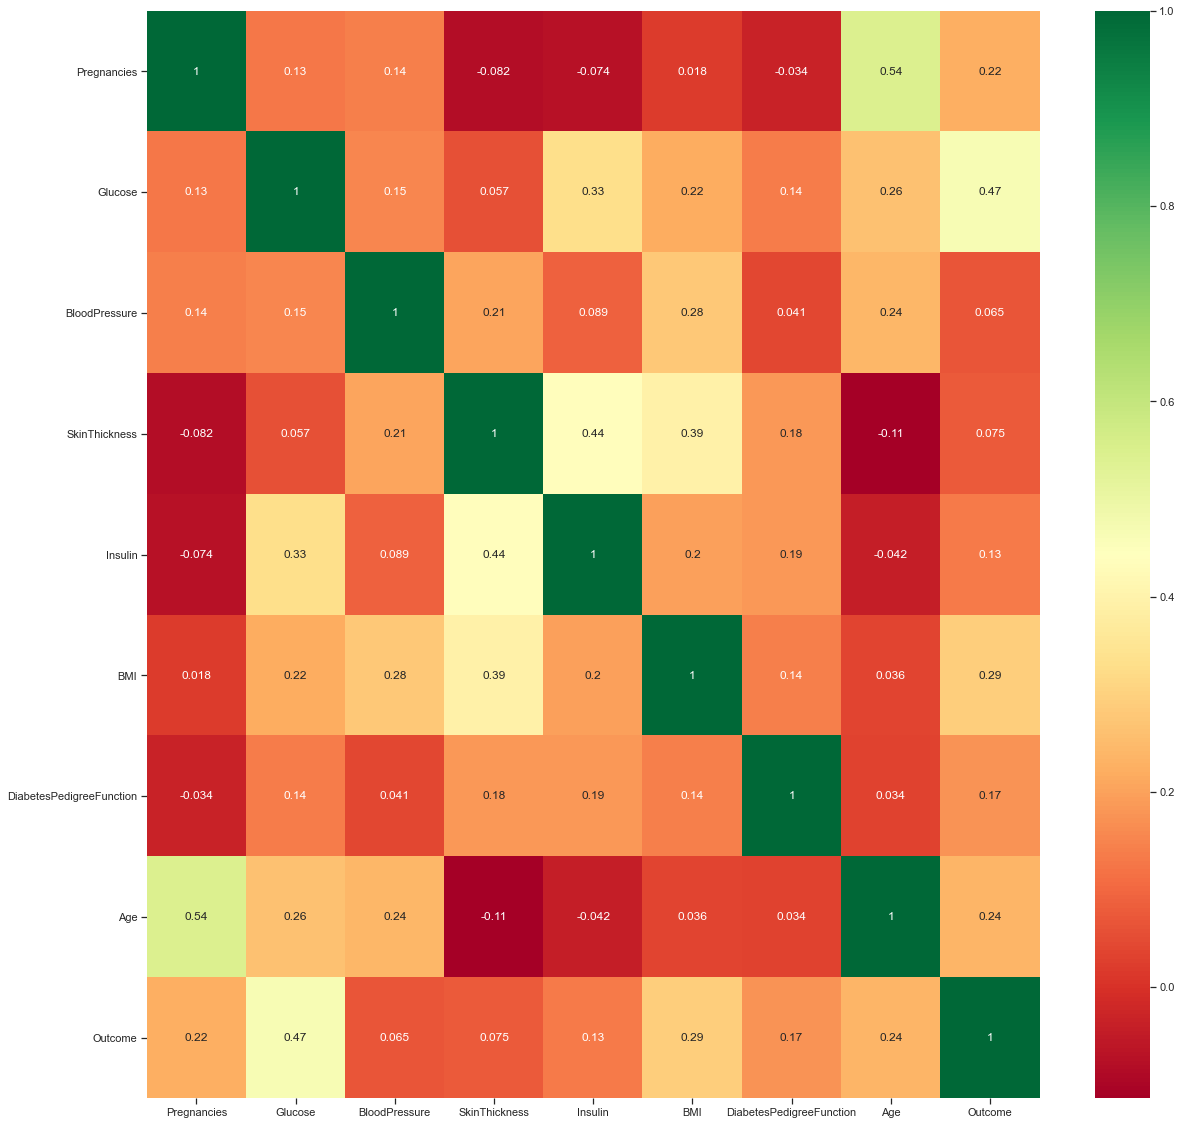

In [14]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
#Spliting the data
X = df.drop("Outcome",axis=1)
y = df["Outcome"]
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)

LR.fit(X_train,y_train)

## Evaluating the model
LR.score(X_test,y_test)

0.7792207792207793

In [17]:
#cv_result = cross_validate(LR, X_test, y_test, cv=5, scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"])
y_pred = LR.predict(X_test)

In [21]:
X_test.shape

(231, 8)

In [ ]:
MSE1 = mean_absolute_error(y_test,y_pred)
RMSE1 = np.sqrt(MSE1)

print(MSE1)
print(RMSE1)

In [ ]:
result = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
result.head()

In [ ]:
pickle.dump(LR, open('model.pkl', 'wb'))